## Case Predictive Model for Insurance

Implementation of machine learning models and comparing performances using an anonymized data set regarding insurance acceptance.

In [1]:
## Install
!pip install -q xgboost

In [2]:
## Imports
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

#### Carregamento dos dados

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.shape

(11500, 179)

In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,False
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,True
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,False
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,False
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,False


#### Análise Exploratória e Limpeza dos Dados

In [6]:
### Resumo Estatístico
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-8.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,35.000000,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,2047.000000,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


In [7]:
## Valores Ausentes
data.isnull().values.any()

False

In [8]:
data.isnull().sum().sort_values(ascending=False)

X1              0
X135            0
X115            0
X116            0
X117            0
               ..
X62             0
X63             0
X64             0
X65             0
LABEL_TARGET    0
Length: 179, dtype: int64

In [9]:
## Valores Duplicados
data.columns.duplicated().sum()

0

In [10]:
data.duplicated().sum()

0

#### Prepara colunas

In [11]:
len(data.columns)

179

In [12]:
# Extrai a lista de colunas
list_columns = data.columns.tolist()

In [13]:
# Colunas das variáveis de entrada (input)
columns_entry = list_columns[0:178]

In [14]:
print(columns_entry)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X1

In [15]:
# Função calcula a prevalência da classe positiva (label = 1)
def calc_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)

In [16]:
print("Prevalência da classe positiva: %.3f"% calc_prevalencia(data["LABEL_TARGET"].values))

Prevalência da classe positiva: 0.200


In [17]:
## Verificando variável alvo
count_v = data['LABEL_TARGET'].value_counts()
count_v

LABEL_TARGET
False    9200
True     2300
Name: count, dtype: int64

In [18]:
total_v = data['LABEL_TARGET'].value_counts().sum()
total_v

11500

In [19]:
## Percentual variável alvo
perc = count_v/total_v *100
perc

LABEL_TARGET
False    80.0
True     20.0
Name: count, dtype: float64

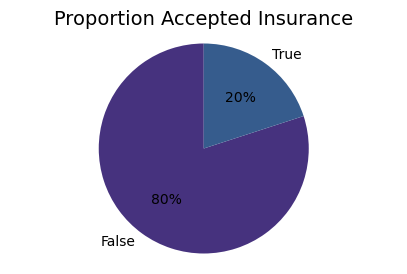

In [20]:
fig, ax = plt.subplots(figsize = (5, 3))

counts = data['LABEL_TARGET'].value_counts()
labels = counts.index.tolist()

colors = sns.color_palette('viridis')

ax.pie(counts, labels = labels, colors = colors, autopct= '%.0f%%', startangle=90)

ax.set_title('Proportion Accepted Insurance', fontsize = 14)

ax.axis('equal')

plt.show()

In [21]:
# Converte de string para valor numérico
data["LABEL_TARGET"] = data["LABEL_TARGET"].astype(int)

In [22]:
data['LABEL_TARGET'].value_counts()

LABEL_TARGET
0    9200
1    2300
Name: count, dtype: int64

#### Divisão dos dados

In [23]:
#Amostra aleatória
data_am = data.sample(n = len(data))

In [24]:
data_am

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
7751,8,16,13,3,-4,-12,-7,7,13,24,...,50,44,28,11,7,0,1,1,8,0
10011,-330,-369,-328,-240,-162,-102,-61,-18,26,75,...,249,265,261,228,212,215,225,231,217,1
5408,74,80,86,101,122,145,166,172,161,132,...,68,61,49,58,74,102,105,100,94,0
7744,47,43,40,40,39,43,45,48,47,44,...,-72,-69,-61,-51,-28,-18,-16,-34,-35,0
11425,-73,-98,-122,-106,-105,-92,-77,-70,-50,-21,...,39,61,102,135,145,136,125,115,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,-72,-87,-89,-83,-35,6,19,16,6,-12,...,-86,-92,-89,-81,-47,16,40,61,72,0
11225,64,41,18,19,24,32,29,32,34,49,...,-34,-32,-16,15,32,45,35,21,23,0
6379,-8,-22,-34,-38,-42,-46,-57,-71,-83,-96,...,-72,-80,-92,-89,-87,-85,-84,-76,-62,0
6594,-311,-307,-301,-300,-293,-283,-282,-277,-274,-272,...,-106,-117,-123,-136,-152,-167,-178,-193,-207,0


In [25]:
# Ajuste de índices
data_am = data_am.reset_index(drop=True)

In [26]:
data_am

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
0,8,16,13,3,-4,-12,-7,7,13,24,...,50,44,28,11,7,0,1,1,8,0
1,-330,-369,-328,-240,-162,-102,-61,-18,26,75,...,249,265,261,228,212,215,225,231,217,1
2,74,80,86,101,122,145,166,172,161,132,...,68,61,49,58,74,102,105,100,94,0
3,47,43,40,40,39,43,45,48,47,44,...,-72,-69,-61,-51,-28,-18,-16,-34,-35,0
4,-73,-98,-122,-106,-105,-92,-77,-70,-50,-21,...,39,61,102,135,145,136,125,115,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-72,-87,-89,-83,-35,6,19,16,6,-12,...,-86,-92,-89,-81,-47,16,40,61,72,0
11496,64,41,18,19,24,32,29,32,34,49,...,-34,-32,-16,15,32,45,35,21,23,0
11497,-8,-22,-34,-38,-42,-46,-57,-71,-83,-96,...,-72,-80,-92,-89,-87,-85,-84,-76,-62,0
11498,-311,-307,-301,-300,-293,-283,-282,-277,-274,-272,...,-106,-117,-123,-136,-152,-167,-178,-193,-207,0


In [27]:
# Amostra de 30% dos dados
data_am_30 = data_am.sample(frac = 0.30)

In [28]:
data_am_30

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
5840,-44,-33,-12,-11,19,14,3,-10,-27,34,...,-94,-93,-63,-32,-13,-21,-9,0,3,0
1404,570,806,924,971,896,737,557,375,208,71,...,-541,-641,-662,-683,-769,-514,-211,292,648,1
7802,-143,-159,-147,-128,-104,-73,-39,-4,7,16,...,-130,-130,-121,-109,-90,-88,-93,-95,-96,0
9476,-11,-3,-11,-4,-6,-19,-17,-8,-1,4,...,72,79,119,118,114,73,40,11,4,0
89,-3,0,0,1,-3,1,5,8,2,1,...,-16,-14,-6,-2,10,17,26,37,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408,-212,-279,-271,-163,-23,86,121,106,77,50,...,-221,-223,-192,-163,-128,-106,-89,-68,-55,1
4014,163,162,168,196,236,254,261,265,283,295,...,-8,-1,12,28,47,49,38,17,17,0
1571,96,93,98,85,89,85,90,70,66,38,...,44,60,52,71,72,69,63,62,41,0
2066,116,83,6,-79,-130,-114,-85,-60,-21,-1,...,1,3,11,9,-8,-28,-7,9,16,0


In [29]:
print("Tamanho da divisão de validação / teste: %.1f" % (len(data_am_30) / len(data_am)))

Tamanho da divisão de validação / teste: 0.3


In [30]:
# Fazendo a divisão

# Dados de teste
data_teste = data_am_30.sample(frac = 0.5)

# Dados se validação
data_valid = data_am_30.drop(data_teste.index)

# Dados de treino
data_treino = data_am.drop(data_am_30.index)

In [31]:
data_teste

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
6597,4,4,2,3,1,-1,-4,-3,-10,-13,...,-26,-18,-12,-6,4,9,10,11,10,0
9005,-28,-44,-63,-85,-94,-101,-109,-111,-109,-105,...,-118,-123,-130,-137,-146,-150,-153,-150,-147,0
3706,-81,-8,47,64,61,32,9,-11,-2,54,...,155,35,-57,-126,-162,-150,-51,101,244,1
1539,-118,-84,-52,-27,-19,-18,-15,-9,13,41,...,-42,0,31,49,40,8,-30,-53,-71,0
9133,31,30,45,60,20,15,8,14,-3,-21,...,38,53,73,55,75,55,11,-15,-77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,-3,-13,-23,-30,-45,-52,-59,-50,-28,-32,...,-27,10,40,47,41,32,19,-13,-46,0
5343,-20,13,31,68,92,113,131,122,120,120,...,12,-28,-49,-54,-55,-39,-38,-33,-37,0
986,-23,4,10,6,27,52,81,-151,-150,-120,...,-17,-43,-93,-138,-166,-160,-123,-66,-7,0
484,-215,-284,-279,-210,-114,-32,25,67,78,62,...,48,34,25,16,1,-11,-23,-28,-47,1


In [32]:
data_valid

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
7802,-143,-159,-147,-128,-104,-73,-39,-4,7,16,...,-130,-130,-121,-109,-90,-88,-93,-95,-96,0
3325,-496,-593,-627,-630,-571,-456,-271,-83,46,75,...,130,145,150,145,139,138,140,139,137,1
7515,-50,-45,-27,-6,-1,-20,-43,-65,-64,-39,...,33,41,36,22,36,43,51,34,18,0
4996,-27,-27,-27,-26,-30,-38,-48,-53,-56,-57,...,14,13,3,5,5,-3,-2,1,9,0
1955,83,90,62,-16,-105,-200,-268,-302,-292,-252,...,-5,-38,-72,-101,-126,-149,-151,-115,-51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408,-212,-279,-271,-163,-23,86,121,106,77,50,...,-221,-223,-192,-163,-128,-106,-89,-68,-55,1
4014,163,162,168,196,236,254,261,265,283,295,...,-8,-1,12,28,47,49,38,17,17,0
1571,96,93,98,85,89,85,90,70,66,38,...,44,60,52,71,72,69,63,62,41,0
2066,116,83,6,-79,-130,-114,-85,-60,-21,-1,...,1,3,11,9,-8,-28,-7,9,16,0


In [33]:
data_treino

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,LABEL_TARGET
0,8,16,13,3,-4,-12,-7,7,13,24,...,50,44,28,11,7,0,1,1,8,0
2,74,80,86,101,122,145,166,172,161,132,...,68,61,49,58,74,102,105,100,94,0
3,47,43,40,40,39,43,45,48,47,44,...,-72,-69,-61,-51,-28,-18,-16,-34,-35,0
4,-73,-98,-122,-106,-105,-92,-77,-70,-50,-21,...,39,61,102,135,145,136,125,115,91,0
6,383,434,498,128,-1,-126,-212,-191,-37,251,...,827,889,546,35,-546,-826,-869,-615,-264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-72,-87,-89,-83,-35,6,19,16,6,-12,...,-86,-92,-89,-81,-47,16,40,61,72,0
11496,64,41,18,19,24,32,29,32,34,49,...,-34,-32,-16,15,32,45,35,21,23,0
11497,-8,-22,-34,-38,-42,-46,-57,-71,-83,-96,...,-72,-80,-92,-89,-87,-85,-84,-76,-62,0
11498,-311,-307,-301,-300,-293,-283,-282,-277,-274,-272,...,-106,-117,-123,-136,-152,-167,-178,-193,-207,0


In [34]:
# Calculo da prevalência de cada subconjunto
print(
    "Teste(n = %d): %.3f"
    % (len(data_teste), calc_prevalencia(data_teste.LABEL_TARGET.values))
)
print(
    "Validação(n = %d): %.3f"
    % (len(data_valid), calc_prevalencia(data_valid.LABEL_TARGET.values))
)
print(
    "Treino(n = %d): %.3f"
    % (len(data_treino), calc_prevalencia(data_treino.LABEL_TARGET.values))
)

Teste(n = 1725): 0.196
Validação(n = 1725): 0.197
Treino(n = 8050): 0.202


### Balanceamento

##### Undersampling

In [35]:
data_teste.shape

(1725, 179)

In [36]:
data_valid.shape

(1725, 179)

In [37]:
data_treino.shape

(8050, 179)

In [38]:
data_treino.LABEL_TARGET.value_counts()

LABEL_TARGET
0    6427
1    1623
Name: count, dtype: int64

In [39]:
indice = data_treino.LABEL_TARGET == 1

In [40]:
# Define valores positivos e negativos do índice
data_train_pos = data_treino.loc[indice]
data_train_neg = data_treino.loc[~indice]

In [41]:
# Valor mínimo de registros entre classe positiva e negativa
valor_minimo = np.min([len(data_train_pos), len(data_train_neg)])

In [42]:
valor_minimo

1623

In [43]:
# Obtém valores aleatórios para o dataset de treino
data_treino_final = pd.concat([data_train_pos.sample(n = valor_minimo, random_state = 69), 
                             data_train_neg.sample(n = valor_minimo, random_state = 69)], 
                            axis = 0, 
                            ignore_index = True)

In [44]:
# Amostragem aleatória do dataset de treino
data_treino_final = data_treino_final.sample(n = len(data_treino_final), random_state = 69).reset_index(drop = True)

In [45]:
data_treino_final.shape

(3246, 179)

In [46]:
data_treino_final.LABEL_TARGET.value_counts()

LABEL_TARGET
0    1623
1    1623
Name: count, dtype: int64

In [47]:
# Balanceamento do conjunto de dados
print('Balanceamento em Treino(n = %d): %.3f'%(len(data_treino_final), 
                                               calc_prevalencia(data_treino_final.LABEL_TARGET.values)))

Balanceamento em Treino(n = 3246): 0.500


#### Prepara Matrizes

In [48]:
# Prepara a Matrix X
X_treino = data_treino_final[columns_entry].values
X_valid = data_valid[columns_entry].values
X_teste = data_teste[columns_entry].values

In [49]:
# Prepara a Matriz Y
y_treino = data_treino_final['LABEL_TARGET'].values
y_valid = data_valid['LABEL_TARGET'].values
y_teste = data_teste['LABEL_TARGET'].values

In [50]:
# Print
print('Shape dos dados de treino:', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação:', X_valid.shape, y_valid.shape)
print('Shape dos dados de teste:', X_teste.shape, y_teste.shape)

Shape dos dados de treino: (3246, 178) (3246,)
Shape dos dados de validação: (1725, 178) (1725,)
Shape dos dados de teste: (1725, 178) (1725,)


In [51]:
type(X_treino)

numpy.ndarray

In [52]:
X_treino

array([[  25,   35,   38, ...,   -1,   -7,   -5],
       [-277, -252, -231, ...,   83,   44,  -66],
       [ -11,  -17,  -23, ...,   31,   54,   53],
       ...,
       [ -14,   -6,   12, ...,   26,   36,   44],
       [ -58,  -78,  -83, ...,  -10,  -21,  -27],
       [  -1,  -12,  -19, ...,   12,   13,   15]], dtype=int64)

#### Padronização dos Dados

In [53]:
# Objeto
scaler = StandardScaler()

In [54]:
# Fit
scaler.fit(X_treino)

StandardScaler()

In [55]:
# Aplica a padronização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [56]:
X_treino_tf

array([[ 0.15861133,  0.19551022,  0.20953677, ...,  0.0625817 ,
         0.03287195,  0.03873887],
       [-1.04777742, -0.95793175, -0.89636841, ...,  0.40819117,
         0.24475608, -0.21234229],
       [ 0.0148034 , -0.01347578, -0.0412447 , ...,  0.19424245,
         0.28630199,  0.27747178],
       ...,
       [ 0.0028194 ,  0.0307328 ,  0.10264631, ...,  0.17367046,
         0.21151936,  0.24042702],
       [-0.17294585, -0.25863243, -0.287915  , ...,  0.02555211,
        -0.02529232, -0.05181499],
       [ 0.05475004,  0.00661903, -0.02480002, ...,  0.11606888,
         0.11596377,  0.12106056]])

#### Modelagem Preditiva

In [57]:
# Função para calcular a especificidade
def calc_specif(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

In [58]:
# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specif(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('Acurácia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')
    
    return auc, accuracy, recall, precision, specificity 

In [59]:
thresh = 0.5

#### Versao 1 - Regressão Logistica (Sem otimização de parâmetros)

In [60]:
# Cria o classificador (objeto)
lr1 = LogisticRegression()

In [61]:
# Treina e cria o modelo
model_v1 = lr1.fit(X_treino_tf, y_treino)

In [62]:
# Previsões 
y_train_preds = model_v1.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v1.predict_proba(X_valid_tf)[:,1]

In [63]:
print('Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr1_train_auc, lr1_train_accuracy, lr1_train_recall, lr1_train_precision, lr1_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
lr1_valid_auc, lr1_valid_accuracy, lr1_valid_recall, lr1_valid_precision, lr1_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)

Modelo de Regressão Logística (Sem Otimização de Hiperparâmetros)

Treinamento:

AUC:0.627
Acurácia:0.664
Recall:0.527
Precisão:0.725
Especificidade:0.800
 
Validação:

AUC:0.495
Acurácia:0.704
Recall:0.378
Precisão:0.299
Especificidade:0.784
 


#### Versao 2 - Regressão Logistica (Com otimização de parâmetros)

In [64]:
# Cria o classificador (objeto)
lr2 = LogisticRegression(random_state = 142, solver = 'liblinear')

In [65]:
# Treina e cria o modelo
model_v2 = lr2.fit(X_treino_tf, y_treino)

In [66]:
# Previsões 
y_train_preds = model_v2.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v2.predict_proba(X_valid_tf)[:,1]

In [67]:
print('Modelo de Regressão Logística (Com Otimização de Hiperparâmetros)\n')

print('Treinamento:\n')
lr2_train_auc, lr2_train_accuracy, lr2_train_recall, lr2_train_precision, lr2_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
lr2_valid_auc, lr2_valid_accuracy, lr2_valid_recall, lr2_valid_precision, lr2_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)


Modelo de Regressão Logística (Com Otimização de Hiperparâmetros)

Treinamento:

AUC:0.629
Acurácia:0.668
Recall:0.530
Precisão:0.733
Especificidade:0.807
 
Validação:

AUC:0.498
Acurácia:0.708
Recall:0.389
Precisão:0.308
Especificidade:0.786
 


#### Versao 3 - Naive Bayes

In [68]:
# Cria o classificador (objeto)
nb = GaussianNB()

In [69]:
# Treina e cria o modelo
model_v3 = nb.fit(X_treino_tf, y_treino)

In [70]:
# Previsões
y_train_preds = model_v3.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v3.predict_proba(X_valid_tf)[:,1]

In [71]:
print('Modelo Naive Bayes:\n')

print('Treinamento:\n')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity = print_report(y_treino, 
                                                                                                              y_train_preds, 
                                                                                                              thresh)

print('Validação:\n')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid, 
                                                                                                              y_valid_preds, 
                                                                                                              thresh)

Modelo Naive Bayes:

Treinamento:

AUC:0.983
Acurácia:0.939
Recall:0.906
Precisão:0.971
Especificidade:0.973
 
Validação:

AUC:0.984
Acurácia:0.956
Recall:0.906
Precisão:0.875
Especificidade:0.968
 


#### Versao 4 - XGBoost (Xtreme Gradient Boosting Classifier)

In [72]:
# Cria o classificador
xgbc = XGBClassifier()

In [73]:
# Treina e cria o modelo
model_v4 = xgbc.fit(X_treino_tf, y_treino)

In [74]:
# Previsões
y_train_preds = model_v4.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v4.predict_proba(X_valid_tf)[:,1]

In [75]:
print('Modelo Xtreme Gradient Boosting Classifier:\n')

print('Treinamento:\n')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, xgbc_train_specificity = print_report(y_treino, 
                                                                                                                        y_train_preds, 
                                                                                                                        thresh)

print('Validação:\n')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, xgbc_valid_specificity = print_report(y_valid, 
                                                                                                                        y_valid_preds, 
                                                                                                                        thresh)


Modelo Xtreme Gradient Boosting Classifier:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.992
Acurácia:0.950
Recall:0.959
Precisão:0.819
Especificidade:0.948
 


#### Versao 5 - Random Forest

In [76]:
# Cria o classificador com RandomForest
rfc = RandomForestClassifier()

In [77]:
# Treina e cria o modelo
model_v5 = rfc.fit(X_treino_tf, y_treino)

In [78]:
# Previsões
y_train_preds = model_v5.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v5.predict_proba(X_valid_tf)[:,1]

In [79]:
print('Modelo Random Forest Classifier:\n')

print('Treinamento:\n')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)

Modelo Random Forest Classifier:

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.993
Acurácia:0.944
Recall:0.985
Precisão:0.784
Especificidade:0.930
 


#### Selecao de Modelos

In [80]:
# Tabela de resultados
results = pd.DataFrame({'classificador':['RL1', 'RL1', 'RL2', 'RL2', 'NB', 'NB', 'XGB', 'XGB', 'RFC', 'RFC'],
                           'data_set':['treino','valid'] * 5,
                           'auc':[lr1_train_auc,
                                  lr1_valid_auc,
                                  lr2_train_auc,
                                  lr2_valid_auc,
                                  nb_train_auc,
                                  nb_valid_auc,
                                  xgbc_train_auc,
                                  xgbc_valid_auc,
                                  rfc_train_auc,
                                  rfc_valid_auc],
                           'accuracy':[lr1_train_accuracy,
                                       lr1_valid_accuracy,
                                       lr2_train_accuracy,
                                       lr2_valid_accuracy,
                                       nb_train_accuracy,
                                       nb_valid_accuracy,
                                       xgbc_train_accuracy,
                                       xgbc_valid_accuracy,
                                       rfc_train_accuracy,
                                       rfc_valid_accuracy],
                           'recall':[lr1_train_recall,
                                     lr1_valid_recall,
                                     lr2_train_recall,
                                     lr2_valid_recall,
                                     nb_train_recall,
                                     nb_valid_recall,
                                     xgbc_train_recall,
                                     xgbc_valid_recall,
                                     rfc_train_recall,
                                     rfc_valid_recall],
                           'precision':[lr1_train_precision,
                                        lr1_valid_precision,
                                        lr2_train_precision,
                                        lr2_valid_precision,
                                        nb_train_precision,
                                        nb_valid_precision,
                                        xgbc_train_precision,
                                        xgbc_valid_precision,
                                        rfc_train_precision,
                                        rfc_valid_precision],
                           'specificity':[lr1_train_specificity,
                                          lr1_valid_specificity,
                                          lr2_train_specificity,
                                          lr2_valid_specificity,
                                          nb_train_specificity,
                                          nb_valid_specificity,
                                          xgbc_train_specificity,
                                          xgbc_valid_specificity,
                                          rfc_train_specificity,
                                          rfc_valid_specificity]})

In [81]:
results

,classificador,data_set,auc,accuracy,recall,precision,specificity
0,RL1,treino,0.627087,0.663894,0.527418,0.725424,0.800370
1,RL1,valid,0.494766,0.703768,0.377581,0.299065,0.783550
2,RL2,treino,0.628703,0.668207,0.529883,0.732538,0.806531
3,RL2,valid,0.497582,0.708406,0.389381,0.308411,0.786436
4,NB,treino,0.983431,0.939310,0.905730,0.970938,0.972890
5,NB,valid,0.983667,0.955942,0.905605,0.874644,0.968254
6,XGB,treino,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB,valid,0.991849,0.950145,0.958702,0.818640,0.948052
8,RFC,treino,1.000000,1.000000,1.000000,1.000000,1.000000
9,RFC,valid,0.993400,0.943768,0.985251,0.784038,0.930014


In [82]:
# Resultados em validação com ordenação pelo AUC
results[results['data_set'] == 'valid'].sort_values(by = 'auc', ascending = False)

,classificador,data_set,auc,accuracy,recall,precision,specificity
9,RFC,valid,0.993400,0.943768,0.985251,0.784038,0.930014
7,XGB,valid,0.991849,0.950145,0.958702,0.818640,0.948052
5,NB,valid,0.983667,0.955942,0.905605,0.874644,0.968254
3,RL2,valid,0.497582,0.708406,0.389381,0.308411,0.786436
1,RL1,valid,0.494766,0.703768,0.377581,0.299065,0.783550


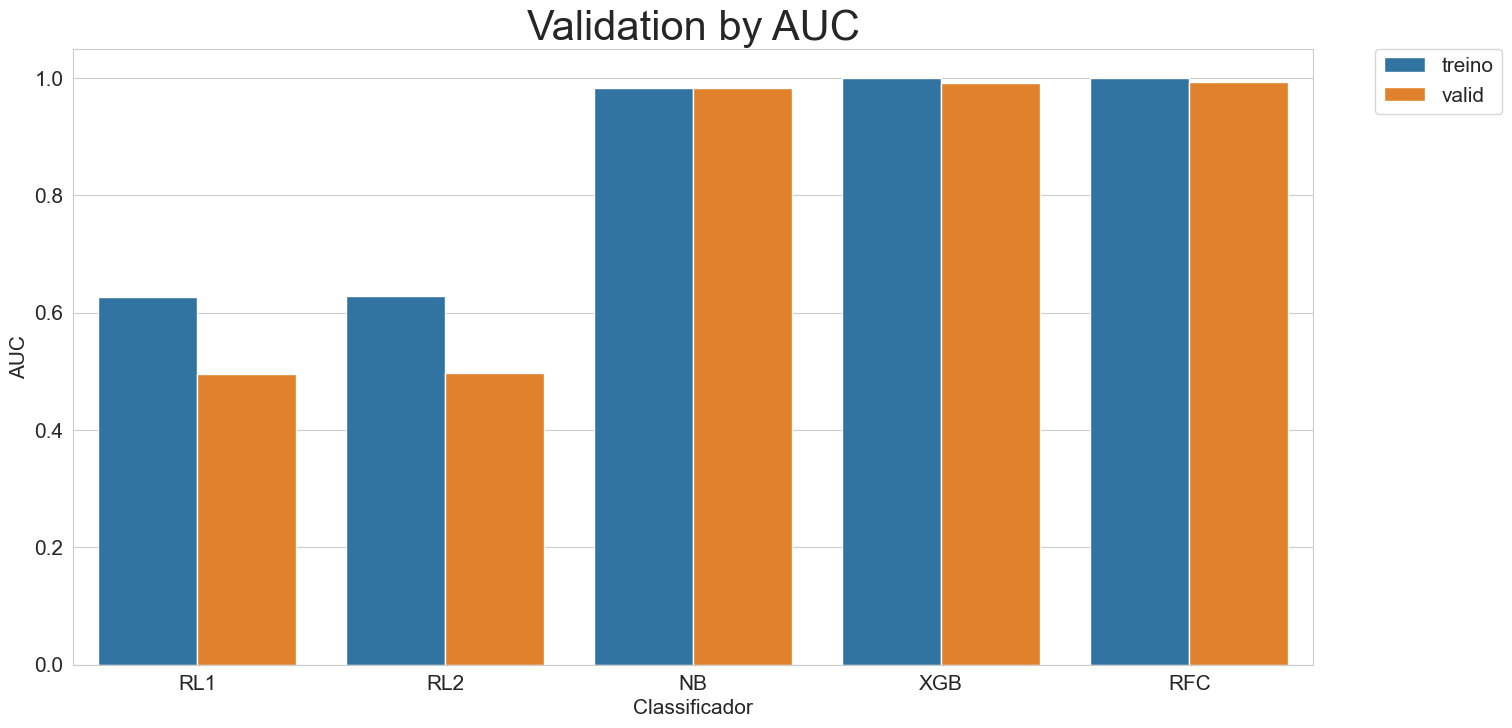

In [93]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = results,)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)
ax.set_title('Validation by AUC', fontsize = 30)



# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

#### Otimização de parâmetros e Validação Cruzada

In [ ]:
%%time

# Importa a função GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defina o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Cria o classificador com RandomForest
classificador = RandomForestClassifier()

# Configura o GridSearchCV
grid_search = GridSearchCV(estimator = classificador, 
                           param_grid = param_grid, 
                           cv = 5, 
                           scoring = 'roc_auc', 
                           verbose = 2, 
                           n_jobs = -1)

# Treina o modelo com validação cruzada e busca pelos melhores hiperparâmetros
model_v5_otimizado = grid_search.fit(X_treino_tf, y_treino)

# Melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros:', model_v5_otimizado.best_params_)

# Previsões
y_train_preds = model_v5_otimizado.predict_proba(X_treino_tf)[:,1]
y_valid_preds = model_v5_otimizado.predict_proba(X_valid_tf)[:,1]

print('Modelo Random Forest Classifier com Otimização de Hiperparâmetros e Validação Cruzada:\n')

print('Treinamento:\n')
rfc_train_auc, rfc_train_accuracy, rfc_train_recall, rfc_train_precision, rfc_train_specificity = print_report(y_treino, 
                                                                                                                   y_train_preds, 
                                                                                                                   thresh)

print('Validação:\n')
rfc_valid_auc, rfc_valid_accuracy, rfc_valid_recall, rfc_valid_precision, rfc_valid_specificity = print_report(y_valid, 
                                                                                                                   y_valid_preds, 
                                                                                                                   thresh)

#### Modelo Escolhido

O modelo RandomForest sem otimização de hiperparâmetros foi escolhido pois é mais simples e requer menos tempo de treinamento.

Modelo RandomForest "Vanilla":

Validação:

- AUC:0.993
- Acurácia:0.958
- Recall:0.977
- Precisão:0.838
- Especificidade:0.951
 

Modelo RandomForest Otimizado:

Validação:

- AUC:0.993
- Acurácia:0.961
- Recall:0.980
- Precisão:0.846
- Especificidade:0.956

Ambos os modelos com RandomForest apresentam desempenho muito alto, mas há algumas nuances a serem consideradas ao escolher qual deles usar:

**Desempenho na validação**: O modelo com otimização de hiperparâmetros tem uma AUC ligeiramente maior na validação, o que indica que ele pode generalizar um pouco melhor. No entanto, outras métricas são um pouco menores nesse modelo. Essas diferenças são pequenas e podem não ser significativas, dependendo do contexto e da importância relativa dessas métricas para o seu problema específico.

**Complexidade e tempo de treinamento**: A otimização de hiperparâmetros aumenta a complexidade do processo de treinamento e o tempo necessário para treinar o modelo. Se o tempo de treinamento for uma preocupação e as diferenças de desempenho forem consideradas insignificantes, você pode optar pelo modelo sem otimização de hiperparâmetros.

##### Avaliação do Modelo Random Forest (sem imperparâmetros)

In [94]:
# Cria matrizes x e y

# X
X_train = data_treino[columns_entry].values
X_valid = data_valid[columns_entry].values
X_test = data_teste[columns_entry].values

# Y
y_train = data_treino['LABEL_TARGET'].values
y_valid = data_valid['LABEL_TARGET'].values
y_test = data_teste['LABEL_TARGET'].values

In [95]:
# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [96]:
# Previsões de probabilidade
y_train_preds = model_v5.predict_proba(X_train_tf)[:,1]
y_valid_preds = model_v5.predict_proba(X_valid_tf)[:,1]
y_test_preds = model_v5.predict_proba(X_test_tf)[:,1]

In [97]:
thresh = 0.5


In [98]:

print('\nTreinamento:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,
                                                                                               y_train_preds, 
                                                                                               thresh)

print('\nValidação:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,
                                                                                               y_valid_preds, 
                                                                                               thresh)

print('\nTeste:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,
                                                                                          y_test_preds, 
                                                                                          thresh)


Treinamento:

AUC:0.999
Acurácia:0.966
Recall:1.000
Precisão:0.855
Especificidade:0.955
 

Validação:

AUC:0.993
Acurácia:0.944
Recall:0.985
Precisão:0.784
Especificidade:0.930
 

Teste:

AUC:0.994
Acurácia:0.949
Recall:0.979
Precisão:0.803
Especificidade:0.940
 


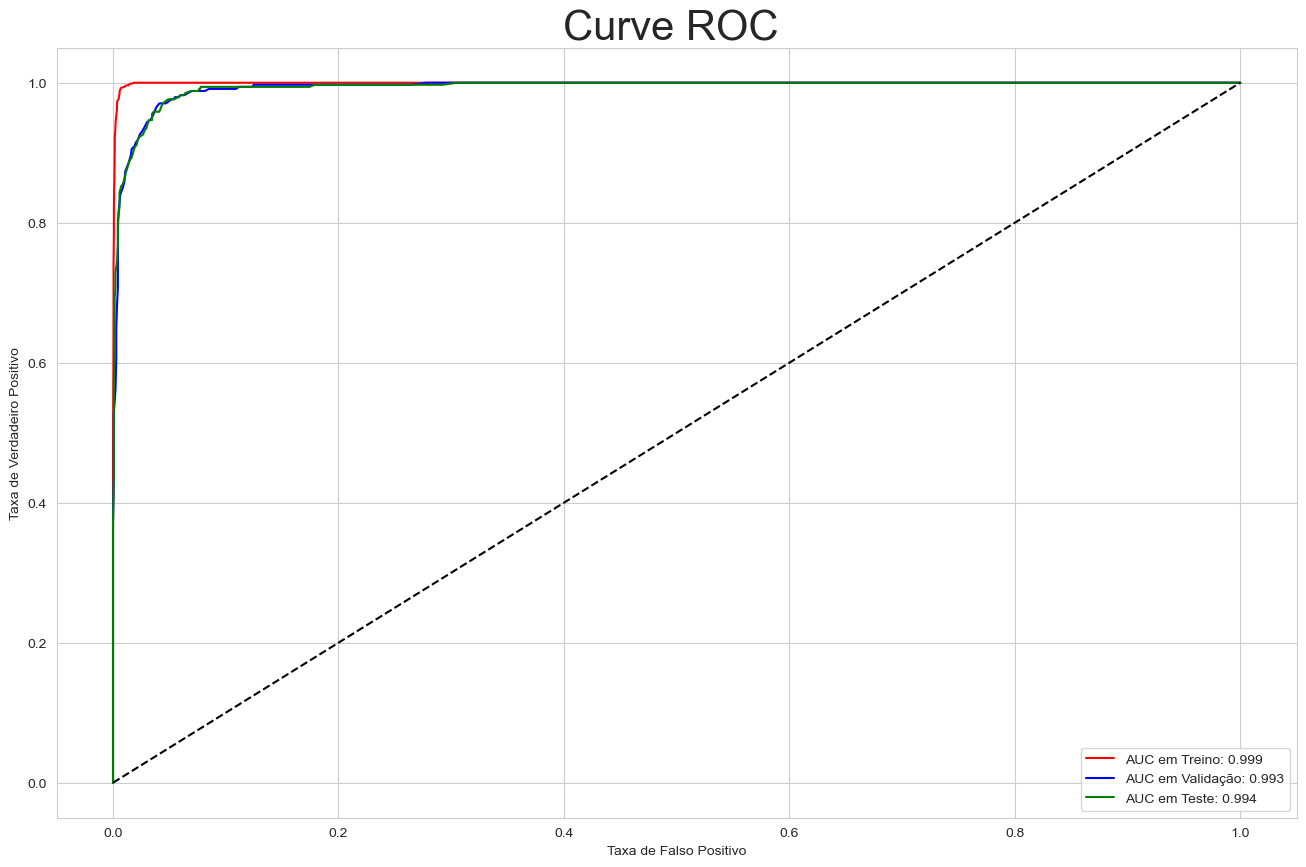

In [101]:
# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC em Treino: %.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC em Validação: %.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC em Teste: %.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curve ROC ', fontsize = 30)
plt.legend()
plt.show()

#### Deploy

In [92]:
new_customer = pd.read_csv('novo_cliente.csv')

In [ ]:
new_customer.head()

In [94]:
new_customer_scaled = scaler.transform(new_customer)

In [ ]:
new_customer_scaled

In [ ]:
model_v5.predict_log_proba(new_customer_scaled)

In [ ]:
model_v5.predict(new_customer_scaled)

De acordo com a previsão do modelo, esse cliente vai fazer a renovação do seguro.